<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-26 23:08:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.4’

survey-data.csv.4   100%[===================>] 152.13M  66.9MB/s    in 2.3s    

2025-04-26 23:08:14 (66.9 MB/s) - ‘survey-data.csv.4’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 142.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 180.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 146.4 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the datafrdame to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


In [10]:
df.columns = df.columns.str.strip()

## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


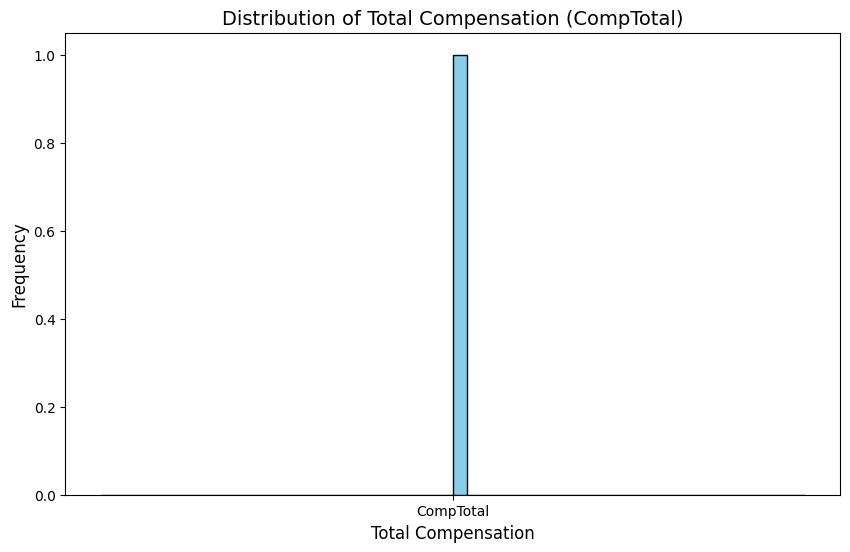

In [11]:
## Write your code here
QUERY = """
SELECT CompTotal FROM main
"""
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist('CompTotal', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)', fontsize=14)
plt.xlabel('Total Compensation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Box Plots**

Plot a box plot of Age.


In [12]:
QUERY = "SELECT DISTINCT Age FROM main"
df_age = pd.read_sql_query(QUERY, conn)
print(df_age['Age'].dropna().unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


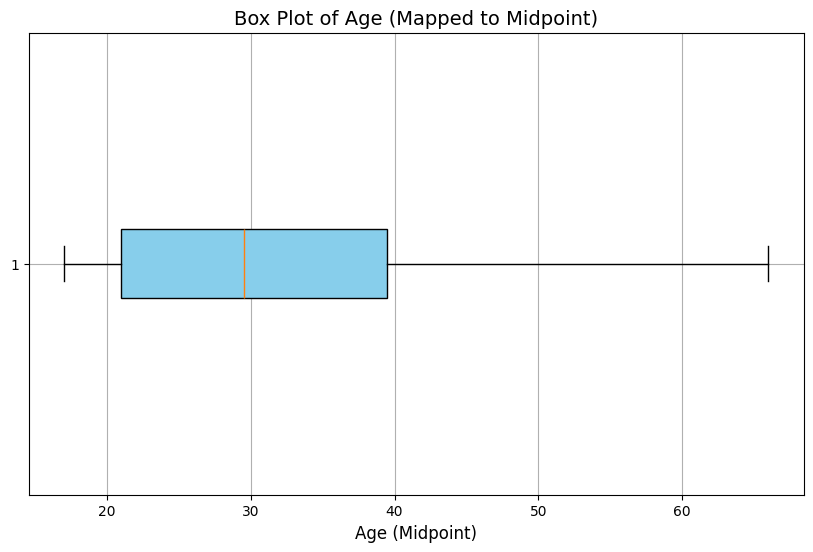

In [13]:
## Write your code here
QUERY = """
SELECT Age FROM main
"""
df = pd.read_sql_query(QUERY, conn)
# map age to midpoint
age_midpoint_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 66,
    'Prefer not to say': None
}
# apply mapping
df['AgeMidpoint'] = df['Age'].map(age_midpoint_map)
# drop na
df = df.dropna(subset=['AgeMidpoint'])
# boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['AgeMidpoint'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Box Plot of Age (Mapped to Midpoint)', fontsize=14)
plt.xlabel('Age (Midpoint)', fontsize=12)
plt.grid(True)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


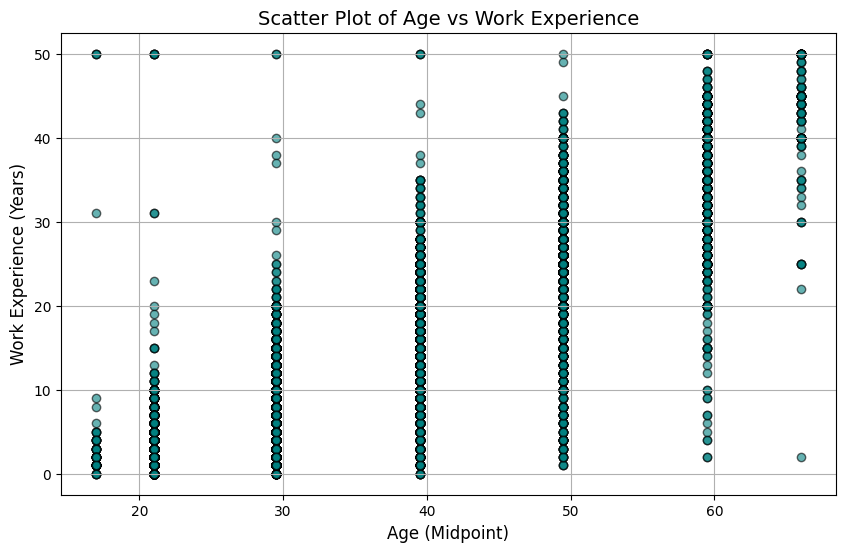

In [14]:
## Write your code here
query = "SELECT Age, WorkExp FROM main"
df = pd.read_sql_query(query, conn)
# map age to midpoint
age_midpoint_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 66,
    'Prefer not to say': None
}
df['AgeMidpoint'] = df['Age'].map(age_midpoint_map)
# drop na
df_clean = df.dropna(subset=['AgeMidpoint', 'WorkExp'])
# scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AgeMidpoint'], df_clean['WorkExp'], alpha=0.6, color='teal', edgecolor='k')
plt.title('Scatter Plot of Age vs Work Experience', fontsize=14)
plt.xlabel('Age (Midpoint)', fontsize=12)
plt.ylabel('Work Experience (Years)', fontsize=12)
plt.grid(True)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [15]:
QUERY = "SELECT DISTINCT TimeSearching FROM main"
df_TS = pd.read_sql_query(QUERY, conn)
print(df_TS)

QUERY = "SELECT DISTINCT Frustration FROM main"
df_F = pd.read_sql_query(QUERY, conn)
print(df_F)

                TimeSearching
0                        None
1         30-60 minutes a day
2        60-120 minutes a day
3         15-30 minutes a day
4  Less than 15 minutes a day
5      Over 120 minutes a day
                                           Frustration
0                                                 None
1    Amount of technical debt;Number of software to...
2    Amount of technical debt;Complexity of tech st...
3    Amount of technical debt;Complexity of tech st...
4    Amount of technical debt;Tracking my work;Comp...
..                                                 ...
950  Tracking my work;Reliability of tools/systems ...
951  Amount of technical debt;Number of software to...
952  Number of software tools in use;Tracking my wo...
953  Amount of technical debt;Number of software to...
954  Amount of technical debt;Tracking my work;Show...

[955 rows x 1 columns]


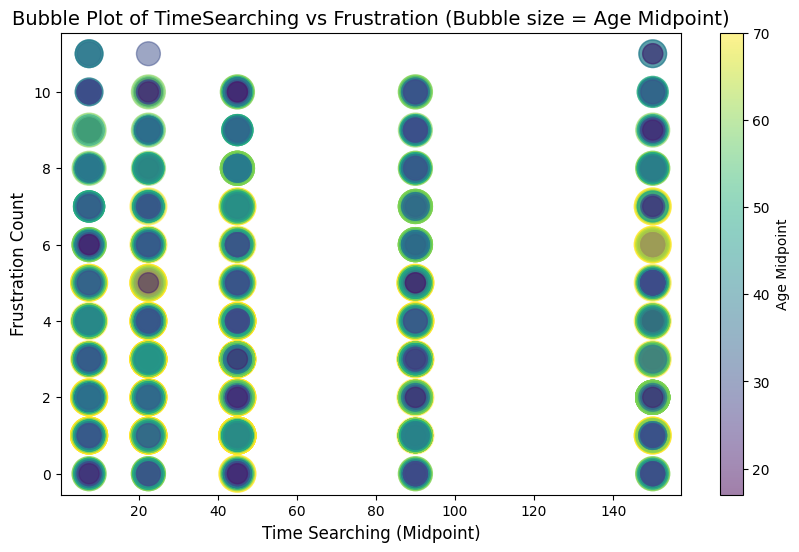

In [16]:
## Write your code here
query = "SELECT TimeSearching, Frustration, Age FROM main"
df = pd.read_sql_query(query, conn)
# check for na vals
df['Frustration'] = df['Frustration'].fillna('None')  # Handle missing values
df['TimeSearching'] = df['TimeSearching'].fillna('None')  # Handle missing values
# frustrationcount
df['FrustrationCount'] = df['Frustration'].apply(lambda x: len(str(x).split(';')) if x != "None" else 0)
# age mapping to midpoint
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": None  # This will be handled later
}
# timesearching mapping to midpoint
time_searching_mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150,
    "None": None  # If there is 'None', we need to handle it
}
# map age and timesearching columns mapping to midpoints
df['AgeMidpoint'] = df['Age'].map(age_mapping)
df['TimeSearchingMidpoint'] = df['TimeSearching'].map(time_searching_mapping)
# drop na
df_clean = df.dropna(subset=['AgeMidpoint', 'TimeSearchingMidpoint'])
# plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean['TimeSearchingMidpoint'], 
    df_clean['FrustrationCount'], 
    s=df_clean['AgeMidpoint'] * 10,  # Bubble size based on AgeMidpoint
    alpha=0.5,  # Transparency
    c=df_clean['AgeMidpoint'],  # Color by AgeMidpoint
    cmap='viridis',  # Color map
)
plt.title('Bubble Plot of TimeSearching vs Frustration (Bubble size = Age Midpoint)', fontsize=14)
plt.xlabel('Time Searching (Midpoint)', fontsize=12)
plt.ylabel('Frustration Count', fontsize=12)
plt.colorbar(label='Age Midpoint')  # Color bar for AgeMidpoint
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


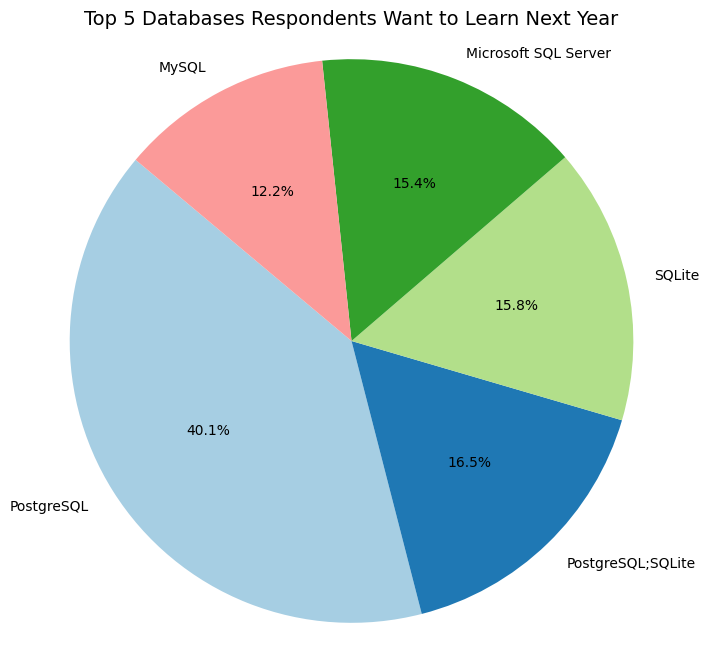

In [17]:
## Write your code here
QUERY = "SELECT DatabaseWantToWorkWith FROM main"
df_databases = pd.read_sql_query(QUERY, conn)
# count top databases
top_databases = df_databases['DatabaseWantToWorkWith'].value_counts().nlargest(5)
# plot
plt.figure(figsize=(8, 8))
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Want to Learn Next Year', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [26]:
QUERY = "SELECT TimeSearching, TimeAnswering FROM main where Age IN ('25-34 years old', '35-44 years old')"
df_databases = pd.read_sql_query(QUERY, conn)
print(df_databases.head())

         TimeSearching         TimeAnswering
0                 None                  None
1                 None                  None
2                 None                  None
3  30-60 minutes a day  60-120 minutes a day
4  30-60 minutes a day   15-30 minutes a day


In [23]:
print(df_databases.columns)  # Print the column names in the dataframe
  
print(df_databases.head())

Index(['TimeSearching', 'TimeAnswering'], dtype='object')
         TimeSearching         TimeAnswering
0                 None                  None
1                 None                  None
2                 None                  None
3  30-60 minutes a day  60-120 minutes a day
4  30-60 minutes a day   15-30 minutes a day


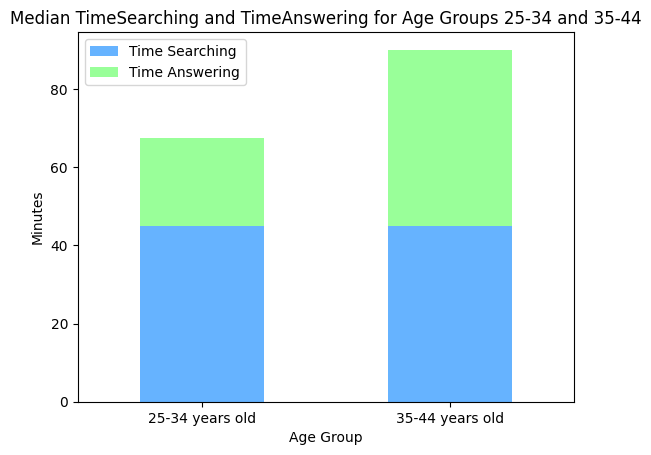

In [31]:
QUERY = "SELECT Age, TimeSearching, TimeAnswering FROM main WHERE Age IN ('25-34 years old', '35-44 years old')"
df_databases = pd.read_sql_query(QUERY, conn)
# TimeSearching mapping
time_searching_mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150,
    "None": None,
    None: None
}
# TimeAnswering mapping
time_answering_mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150,
    "None": None,
    None: None
}
# make new columns
df_databases['TimeSearchingMidpoint'] = df_databases['TimeSearching'].map(time_searching_mapping)
df_databases['TimeAnsweringMidpoint'] = df_databases['TimeAnswering'].map(time_answering_mapping)
# drop na
df_clean = df_databases.dropna(subset=['TimeSearchingMidpoint', 'TimeAnsweringMidpoint'])
# calculate median
median_times = df_clean.groupby('Age')[['TimeSearchingMidpoint', 'TimeAnsweringMidpoint']].median()
# plot
median_times.plot(kind='bar', stacked=True, color=['#66b3ff', '#99ff99'])
plt.title('Median TimeSearching and TimeAnswering for Age Groups 25-34 and 35-44')
plt.ylabel('Minutes')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(['Time Searching', 'Time Answering'])
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


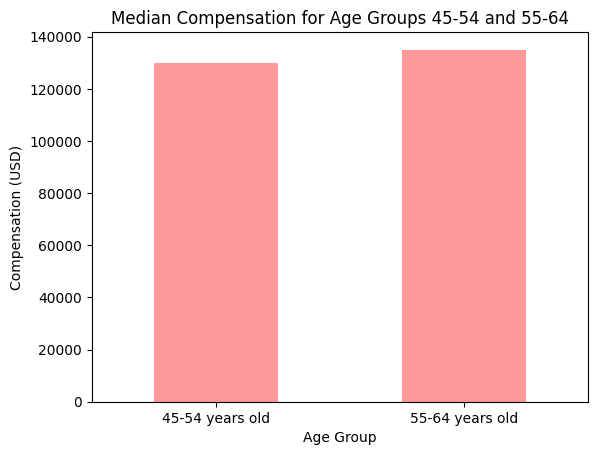

In [32]:
## Write your code here
QUERY = "SELECT Age, CompTotal FROM main"
df_age_comp = pd.read_sql_query(QUERY, conn)
# filter for age groups
age_groups = ['45-54 years old', '55-64 years old']
df_filtered = df_age_comp[df_age_comp['Age'].isin(age_groups)]
# drop na
df_filtered = df_filtered.dropna(subset=['CompTotal'])

# Step 4: Group by Age and calculate the median CompTotal
median_comp = df_filtered.groupby('Age')['CompTotal'].median()

# Step 5: Plot
median_comp.plot(kind='bar', color='#ff9999')
plt.title('Median Compensation for Age Groups 45-54 and 55-64')
plt.ylabel('Compensation (USD)')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
